# **My First ML Project**

# **Load data**

Data Set is taken from Data Professor github

In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


# **Data preparation**

## Data separation as X and y

In [26]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [27]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data splitting

In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
print("Training Data X")
print(X_train)

print("Training Data Y")
print(y_train)

Training Data X
     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
166  5.31380  257.547                1.0            0.800000
97  -0.92640  126.115                0.0            0.666667
714 -0.77160  151.129                0.0            0.818182
328  0.49100  208.217                4.0            0.000000
191  3.60230  207.070                0.0            0.909091
..       ...      ...                ...                 ...
802  3.00254  250.301                1.0            0.842105
53   2.13860   82.146                3.0            0.000000
350  5.76304  256.348                0.0            0.900000
79   3.89960  186.339               10.0            0.000000
792  2.52334  310.297                3.0            0.300000

[800 rows x 4 columns]
Training Data Y
166   -6.270
97    -0.807
714   -3.583
328   -2.077
191   -4.400
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 800, dtype: float64


In [30]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
863,2.65122,266.304,1.0,0.600000
395,4.33190,367.860,7.0,0.285714
1106,3.27520,148.249,1.0,0.545455
374,5.27020,364.914,0.0,0.000000


# **Model Building**

## **Linear Regression**

### **Training the model**

Using Linear Regression to train the model

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [32]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [33]:
print(y_lr_train_pred)

[-5.76071748 -0.21138632 -0.56320332 -1.47672665 -4.21552033 -5.33655234
 -5.32589636 -4.7089393  -2.57194987 -1.90324945 -5.02321513 -1.30655385
 -4.94140205 -5.76071748 -1.610082   -0.48583337 -2.81243736 -3.42081155
 -3.76500782 -2.12630913 -2.34746617 -4.47425322 -1.37321128 -3.00263554
 -1.09378855 -2.67067504 -2.04745838 -3.84832952 -3.42081155 -3.90563247
 -1.61731792 -1.65488328 -2.23218649 -2.34270592 -4.02336375 -0.42737422
 -3.74298037 -3.22054052 -3.29878574 -3.49962987 -0.70813304 -4.63447041
 -2.54118351 -1.56708316  0.10143769 -2.05929668 -2.51119515 -5.15394258
 -3.81239337 -2.08068271 -3.10592638 -5.08339507 -4.5569984  -0.56833521
 -2.1094789  -0.15568756 -2.17445427 -3.91687761 -7.89695189 -1.74991439
 -3.92357517 -1.17828918 -5.41457689 -0.36236626 -5.15565764 -6.56241229
 -2.38687719 -3.66387422 -1.11380224 -1.56874915 -1.06478876 -2.1565049
 -1.35432355 -1.67407588 -5.54540425 -4.40218784 -6.19101177 -5.76760504
 -5.41472896 -2.14919936 -2.4063559  -1.19738523 -2.

In [34]:
print(y_lr_test_pred)

[ -3.05891184  -7.81189266  -2.58438231  -1.99474755  -2.08861447
  -1.02652784  -0.57417717  -0.54479765  -5.76071748  -3.94830501
  -3.9998412   -2.32296491  -1.47368839  -1.47680129  -4.62950425
  -1.92010246  -1.49344158  -3.17828352  -3.7230771   -5.56905485
  -3.27688519  -5.08339507  -5.73369833  -2.1315558   -4.36410454
  -5.06053099  -3.09044139  -4.40199409  -4.23060166   0.58554881
  -1.45546862  -4.38974186  -2.59257215  -1.51192712  -0.57037586
  -1.65215966  -2.79606405  -3.13073677  -5.2928543   -1.77367515
  -1.55574261  -2.0294139   -6.60220457  -7.87458062  -5.79858139
  -4.17235999  -3.41344906   1.47646877  -0.01079585  -2.36558993
  -1.84967119  -5.06053099   0.8825654   -3.18969966  -5.04974569
  -2.00721545  -7.81189266  -1.20415467  -0.88553691  -5.08339507
  -2.4655174   -2.82343039  -2.51391969  -2.35981706  -1.65367893
  -1.51802866  -3.24719792  -2.87992049  -1.86656718  -3.2386027
  -3.40921182  -0.87966624  -4.84845141  -0.74758706  -7.11187403
 -10.575313

### **Evaluate model performance**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [36]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.052922554697329
LR R2 (Train):  0.7594328521298883
LR MSE (Test):  0.9134877174659213
LR R2 (Test):  0.7935230672635001


In [37]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [38]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.052923,0.759433,0.913488,0.793523


## **Random Forest**

### **Training the model**

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [40]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [42]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.013169,0.768516,1.192066,0.730556


## **Model comparison**

In [43]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [44]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.052923,0.759433,0.913488,0.793523
1,Random forest,1.013169,0.768516,1.192066,0.730556


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental LogS')

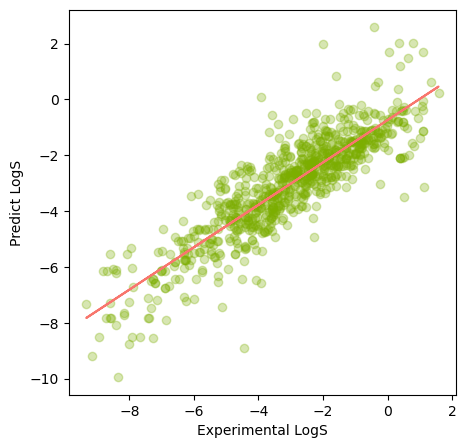

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')